# Model Exploration for PFC and Buck Circuits

This notebook is designed to explore various AI models for optimizing the performance of PFC (Power Factor Correction) circuits and Buck converters. The goal is to enhance dynamic response, improve light-load efficiency, and reduce parameter coupling issues.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Set random seed for reproducibility
np.random.seed(42)

# Load dataset
data = pd.read_csv('../data/training/pfc_buck_data.csv')
data.head()

,input_voltage,load_current,ambient_temp,inductor_value,capacitor_value,switching_freq,kp,ki,kd,zbf,compval,target_variable
0,209.334071,3.308129,36.209225,0.000300,0.000757,74618.541964,0.322691,61.329870,0.002989,0.329932,0.169447,0.957990
1,260.613573,3.958501,34.987363,0.000399,0.000266,73037.686479,0.235053,4.851443,0.000948,0.816738,0.098903,0.961027
2,241.147461,7.064561,30.284617,0.000325,0.000412,100209.597537,0.482604,61.613774,0.001264,0.994377,0.039093,0.950037
3,229.280605,2.871036,43.218000,0.000133,0.000697,118305.816125,0.117299,9.877192,0.001807,0.840762,0.147328,0.936616
4,189.885659,7.187645,39.298725,0.000174,0.000534,95136.065448,0.298050,71.324080,0.002037,0.346143,0.083736,0.956795


## Data Preprocessing

In this section, we will preprocess the data to prepare it for model training.

In [2]:
# Data cleaning and preprocessing
data.dropna(inplace=True)

# Feature selection
features = data.drop('target_variable', axis=1)
target = data['target_variable']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((4000, 11), (1000, 11))

## Model Training

We will train a Random Forest Regressor on the prepared dataset.

In [3]:
# Initialize and train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
mse

1.4280247373750194e-05

## Model Evaluation

We will evaluate the model's performance using Mean Squared Error (MSE).

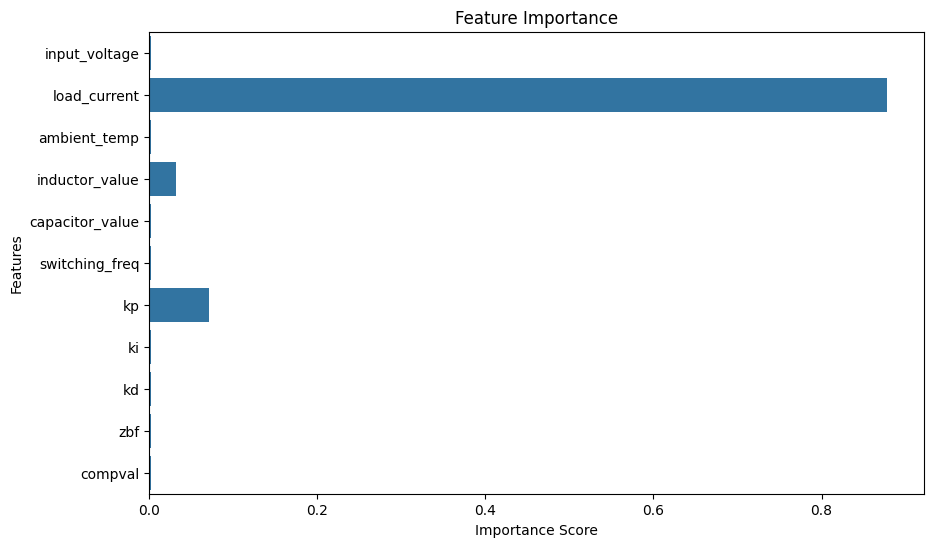

In [4]:
# Visualize feature importance
feature_importances = model.feature_importances_
features_list = features.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=features_list)
plt.title('Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

## Conclusion

In this notebook, we explored the use of a Random Forest model for optimizing PFC and Buck circuits. The feature importance analysis provides insights into which parameters most significantly affect performance.